In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=0)

In [4]:
x

array([[ 1.71396871,  0.56007765, -0.32306624, ..., -1.60478942,
        -0.58348594, -3.38243762],
       [ 0.66335255,  1.69747762, -0.13520391, ..., -1.57702179,
         0.02436752, -0.84967142],
       [ 1.18044791,  0.12533828, -0.22660736, ..., -0.99614512,
         1.54205969, -1.01776843],
       ...,
       [ 0.26502694, -0.34698725,  0.00655853, ...,  1.01873591,
        -1.34601194,  1.48602899],
       [ 1.16928831,  0.44913798, -0.24926731, ..., -0.42176256,
         1.76896219,  0.58426773],
       [ 0.20776858,  0.90404532,  0.01927735, ..., -0.33169018,
        -0.04036453, -2.31778308]])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [6]:
from sklearn.metrics import roc_curve,roc_auc_score

In [14]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(x_train,y_train)
y_train_pred=cl.predict(x_train)
print(roc_auc_score(y_train,y_train_pred))
y_test_pred=cl.predict(x_test)
print(roc_auc_score(y_test,y_test_pred))

1.0
0.9934371523915462


In [18]:
from sklearn.linear_model import LogisticRegression
Ll=LogisticRegression()
Ll.fit(x_train,y_train)
y_train_pred=Ll.predict(x_train)
print(roc_auc_score(y_train,y_train_pred))
y_test_pred=Ll.predict(x_test)
print(roc_auc_score(y_test,y_test_pred))

0.9950107786778156
0.9918242491657396


In [19]:
from sklearn.ensemble import AdaBoostClassifier
hl=AdaBoostClassifier()
hl.fit(x_train,y_train)
y_train_pred=hl.predict(x_train)
print(roc_auc_score(y_train,y_train_pred))
y_test_pred=hl.predict(x_test)
print(roc_auc_score(y_test,y_test_pred))

1.0
0.9934371523915462


In [20]:
from sklearn.neighbors import KNeighborsClassifier
kl=KNeighborsClassifier()
kl.fit(x_train,y_train)
y_train_pred=kl.predict(x_train)
print(roc_auc_score(y_train,y_train_pred))
y_test_pred=kl.predict(x_test)
print(roc_auc_score(y_test,y_test_pred))

0.9877678338123856
0.9758064516129032


In [55]:
pred=[]

for model in [cl,hl,kl,Ll]:
  pred.append(pd.Series(model.predict(x_test)))
final=pd.concat(pred,axis=1).mean(axis=1)
print(roc_auc_score(y_test,final))

0.9950778642936596


In [56]:
final

0      1.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
595    1.0
596    0.0
597    0.0
598    0.0
599    1.0
Length: 600, dtype: float64

In [30]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1,1,1,1
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
595,1,1,1,1
596,0,0,0,0
597,0,0,0,0
598,0,0,0,0


In [32]:
final

0      1.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
595    1.0
596    0.0
597    0.0
598    0.0
599    1.0
Length: 600, dtype: float64

In [33]:
fpr,tpr,threshold=roc_curve(y_test,final)

In [34]:
threshold

array([2.  , 1.  , 0.75, 0.5 , 0.  ])

In [47]:
from sklearn.metrics import accuracy_score
accuracy=[]

for thres in threshold:
  y_pred=np.where(final>thres,1,0)
  accuracy.append(accuracy_score(y_test,y_pred))
accuracy=pd.concat([pd.Series(accuracy),pd.Series(threshold)],axis=1)
accuracy.columns=['accuracy','threshold']
accuracy.sort_values('accuracy',inplace=True,ascending=False)

In [48]:
accuracy

,accuracy,threshold
4,0.993333,0.00
3,0.975000,0.50
2,0.973333,0.75
0,0.483333,2.00
1,0.483333,1.00


In [50]:
import matplotlib.pyplot as plt


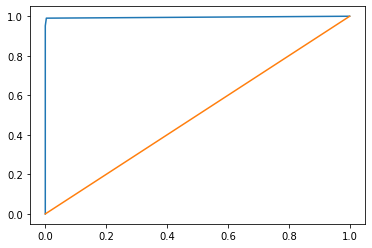

In [52]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])